In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import random
%matplotlib inline

# Initialize Faker
fake = Faker()


# Function to generate weekly data
def generate_weekly_data(start_date, num_weeks):
    dates = pd.date_range(start=start_date, periods=num_weeks, freq='W')
    
    # Generate GDP data with a smoother trend
    gdp_trend = np.linspace(-1, -150, num_weeks)  # Linearly spaced GDP values from -1 to -150 over num_weeks
    gdp_noise = np.random.normal(0, 5, num_weeks)  # Gaussian noise with mean 0 and std deviation 5
    gdp = gdp_trend + gdp_noise  # Add noise to the trend
    gdp = np.clip(gdp, -150, -1).round(2)  # Clip values to ensure they stay within the specified range
    
    # Generate CCI data with slight variations
    cci = np.random.normal(0, 3, num_weeks).round(2)  # Example CCI data with mean 0 and std deviation 3
    
    # Generate CPI data with slight variations
    cpi = np.random.normal(-50, 10, num_weeks).round(2)  # Example CPI data with mean -50 and std deviation 10
    
    data = {
        'date': [date.strftime('%d/%m/%Y') for date in dates],
        'business_operations': np.random.normal(50000, 5000, num_weeks).astype(int),
        'inventory': np.random.normal(1000, 50, num_weeks).astype(int),
        'price': np.random.normal(20, 2, num_weeks).round(2),
        'loyalty_promotions': np.random.randint(1000, 2000, num_weeks),
        'weather': np.random.normal(25, 5, num_weeks).round(2),
        'seasonality': np.random.uniform(0.8, 1.2, num_weeks).round(2),
        'holiday_flags': [1 if fake.date_time_this_year().weekday() == 6 else 0 for _ in range(num_weeks)],  # Sunday as holiday
        'gdp': gdp,
        'cci': cci,
        'cpi': cpi,
        'competition_A_data': np.random.normal(30000, 3000, num_weeks).astype(int),
        'competition_B_data': np.random.normal(32000, 3200, num_weeks).astype(int),
        'competition_C_data': np.random.normal(28000, 2800, num_weeks).astype(int),
        'competition_D_data': np.random.normal(35000, 3500, num_weeks).astype(int),
        'digital_video_impressions': np.random.randint(1000000, 2000000, num_weeks),
        'digital_display_impressions': np.random.randint(900000, 1800000, num_weeks),
        'digital_audio_impressions': np.random.randint(500000, 1000000, num_weeks),
        'paid_social_impressions': np.random.randint(1200000, 2500000, num_weeks),
        'paid_search_impressions': np.random.randint(800000, 1600000, num_weeks),
        'paid_search_clicks': np.random.randint(40000, 80000, num_weeks),
        'affiliates_impressions': np.random.randint(700000, 1400000, num_weeks),
        'affiliates_clicks': np.random.randint(35000, 70000, num_weeks),
        'email_sent': np.random.randint(10000, 20000, num_weeks),
        'tv_grps': np.random.randint(100, 200, num_weeks),
        'radio_grps': np.random.randint(150, 250, num_weeks),
        'print_circulation': np.random.randint(300000, 600000, num_weeks),
        'dm_sent': np.random.randint(5000, 10000, num_weeks),
        
    }
    return pd.DataFrame(data)

# Generate data
num_weeks = 156  # 1 year of weekly data
start_date = '01/01/2022'
df = generate_weekly_data(start_date, num_weeks)

# Save to CSV
df.to_csv('dummy_marketing_mix_data10.csv', index=False)

print("Dummy dataset created and saved as 'dummy_marketing_mix_data10.csv'.")


Dummy dataset created and saved as 'dummy_marketing_mix_data10.csv'.


In [37]:
df['date']

0      02/01/2022
1      09/01/2022
2      16/01/2022
3      23/01/2022
4      30/01/2022
          ...    
151    24/11/2024
152    01/12/2024
153    08/12/2024
154    15/12/2024
155    22/12/2024
Name: date, Length: 156, dtype: object

C:\Users\HP\AppData\Local\Temp\ipykernel_9208\2757241670.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15,5))


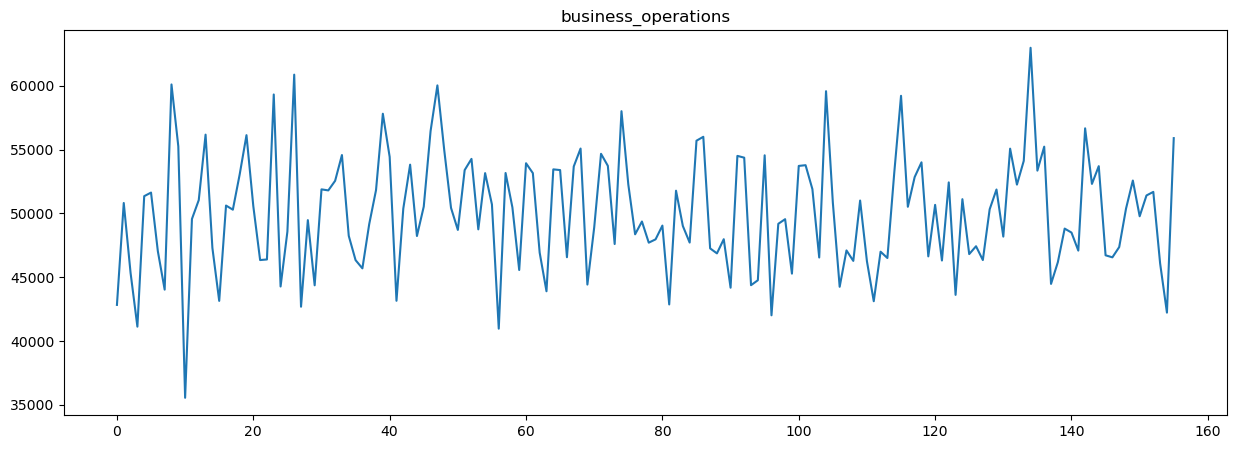

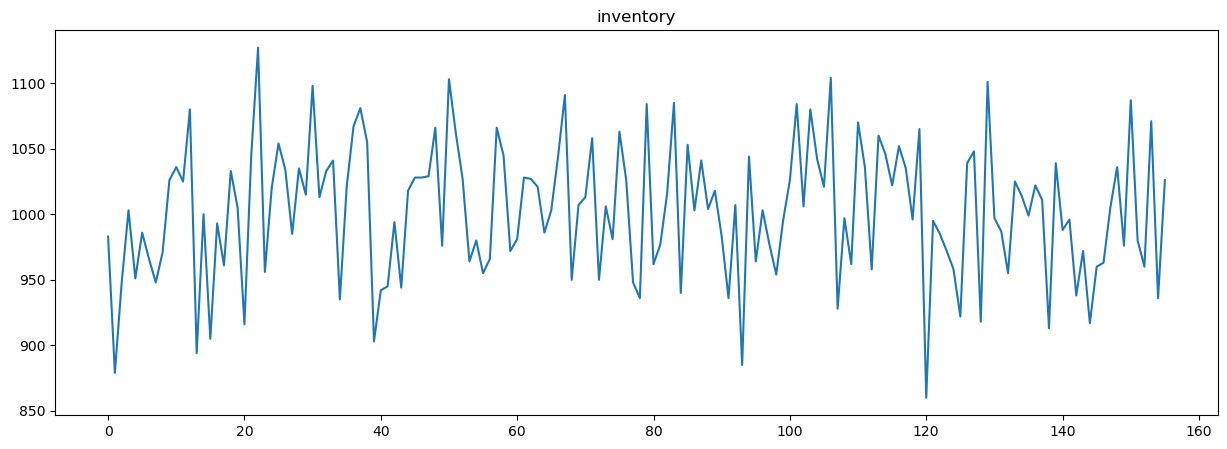

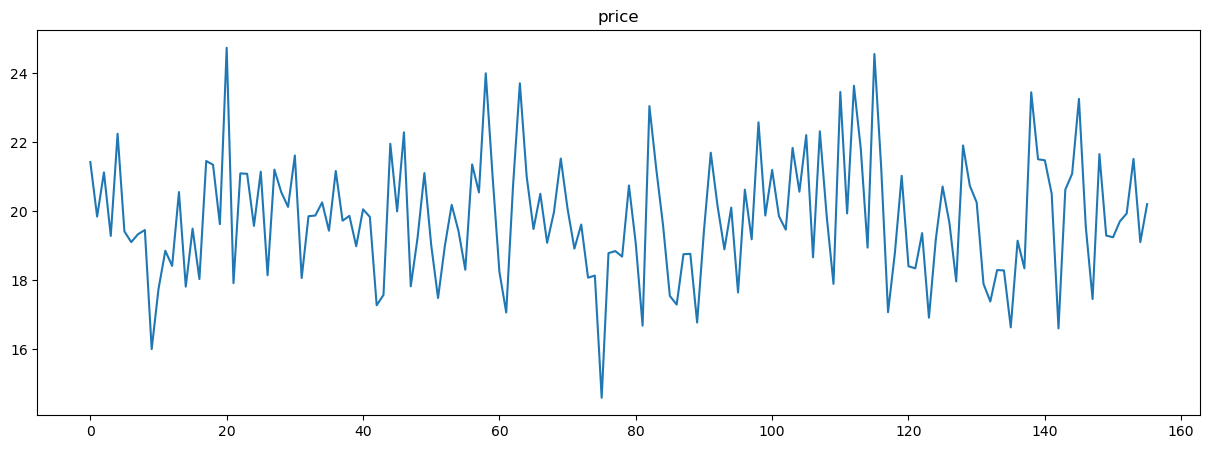

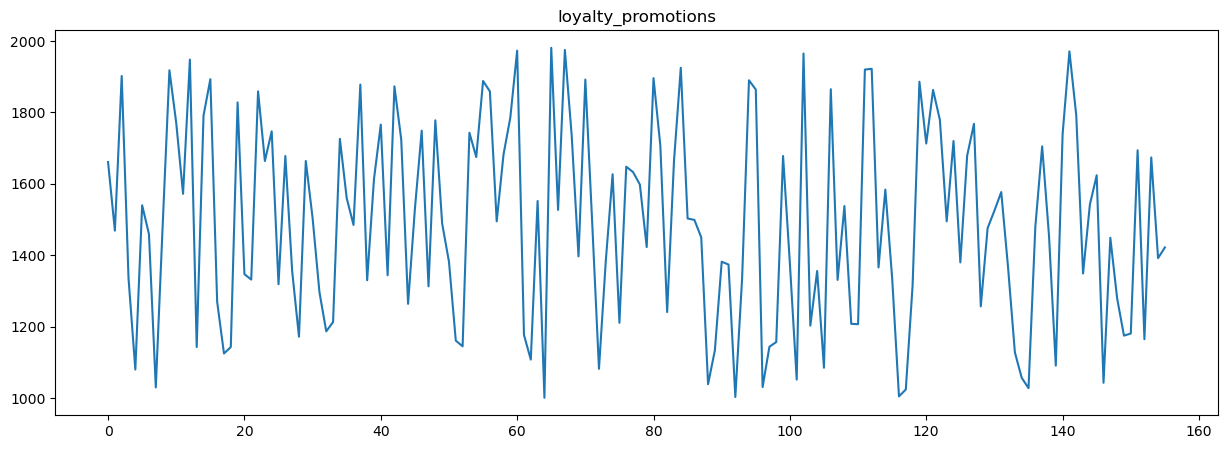

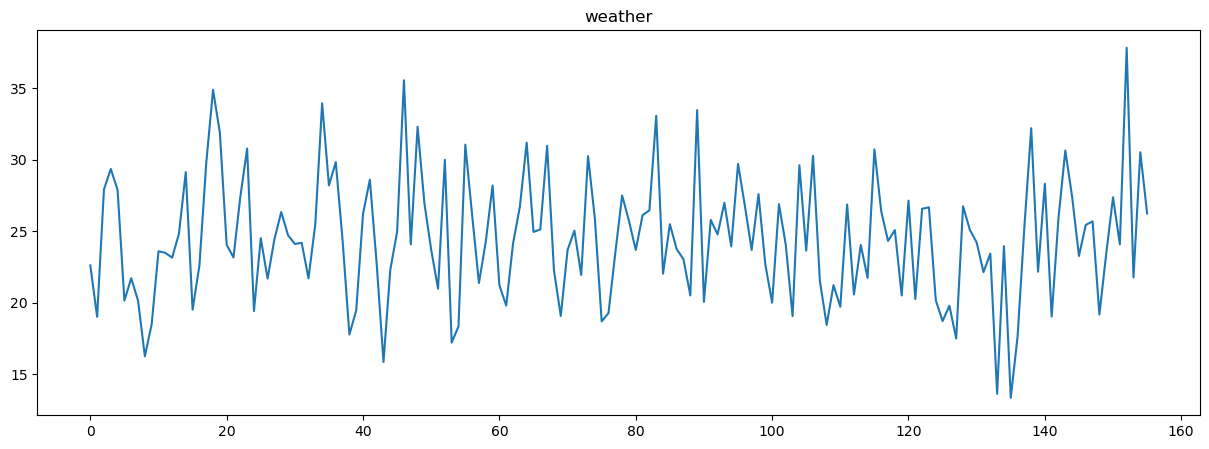

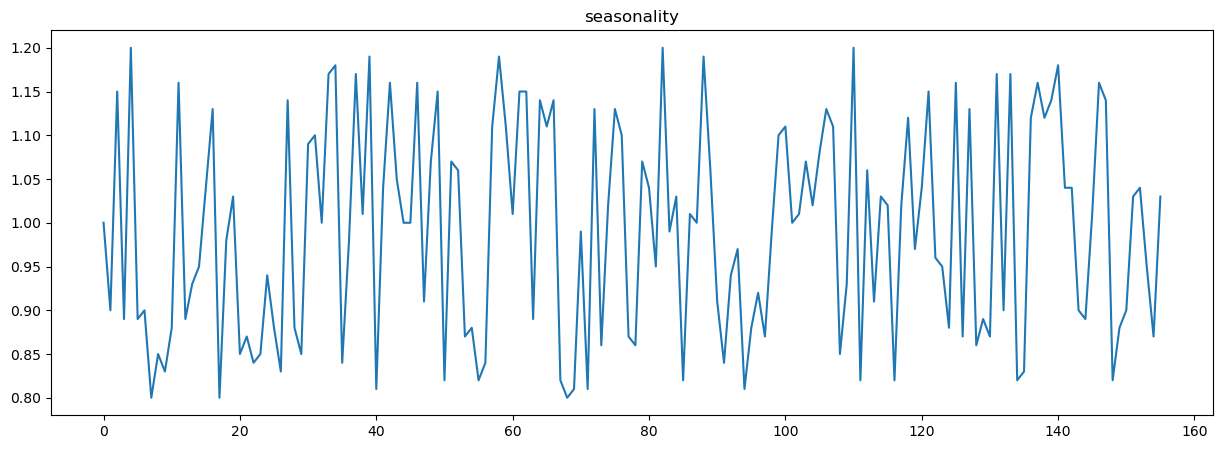

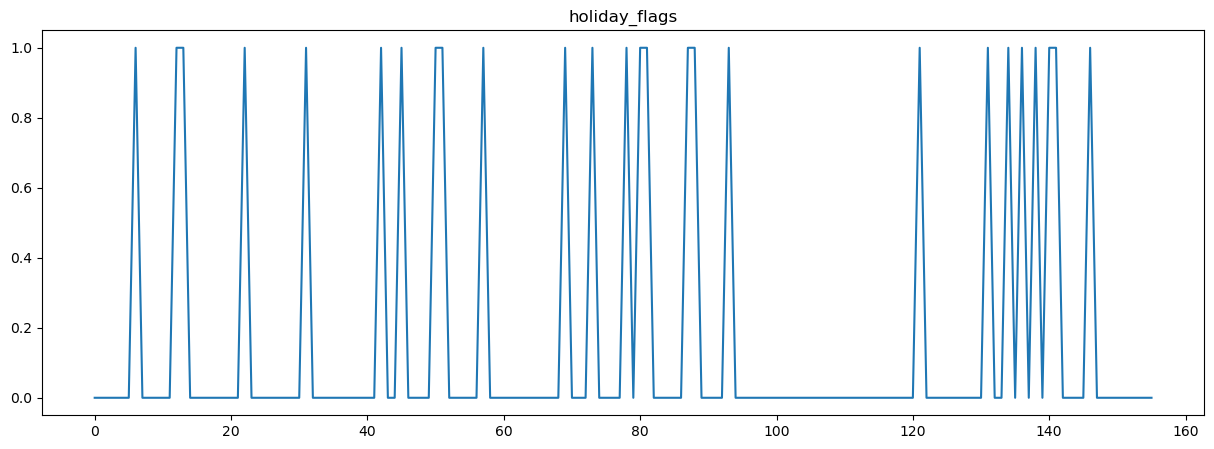

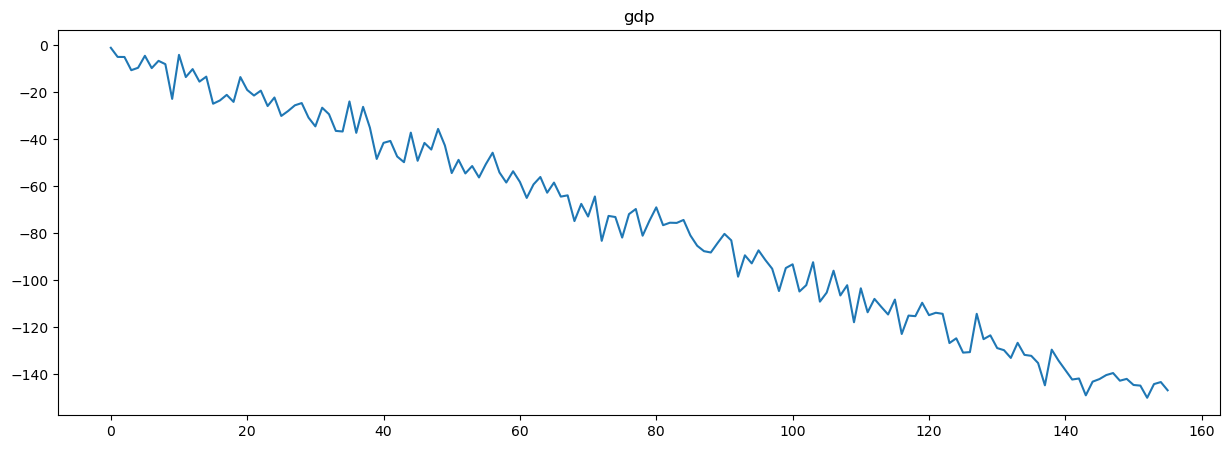

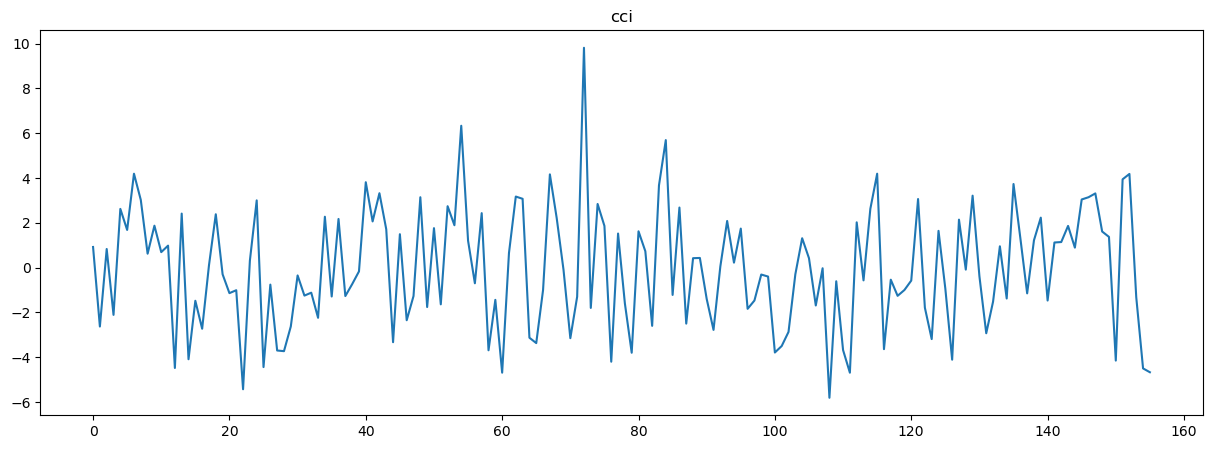

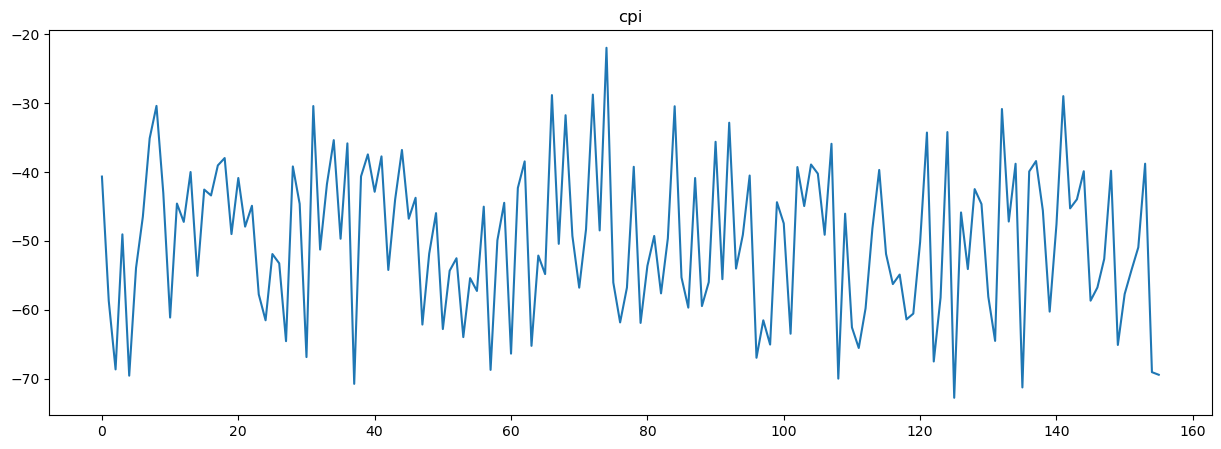

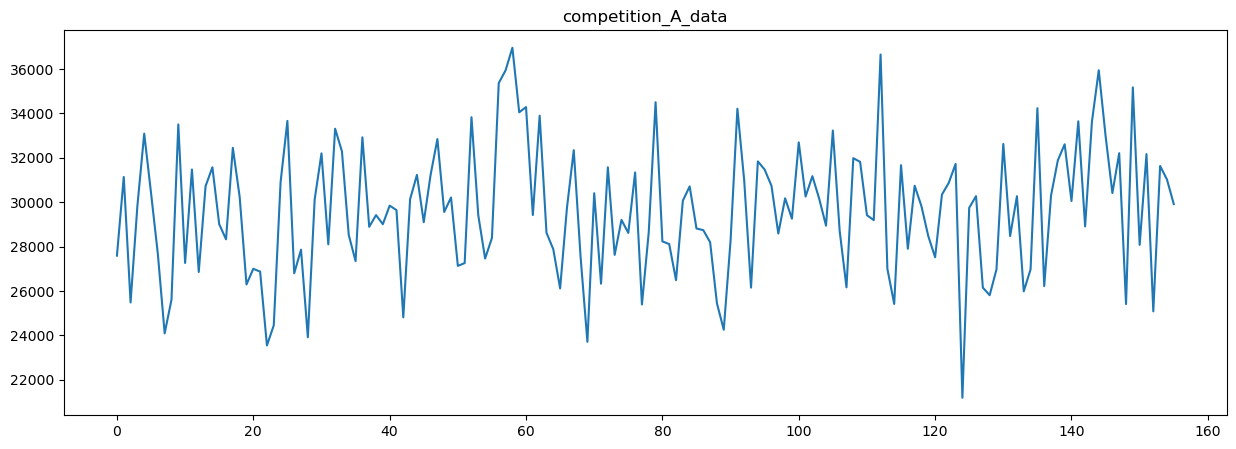

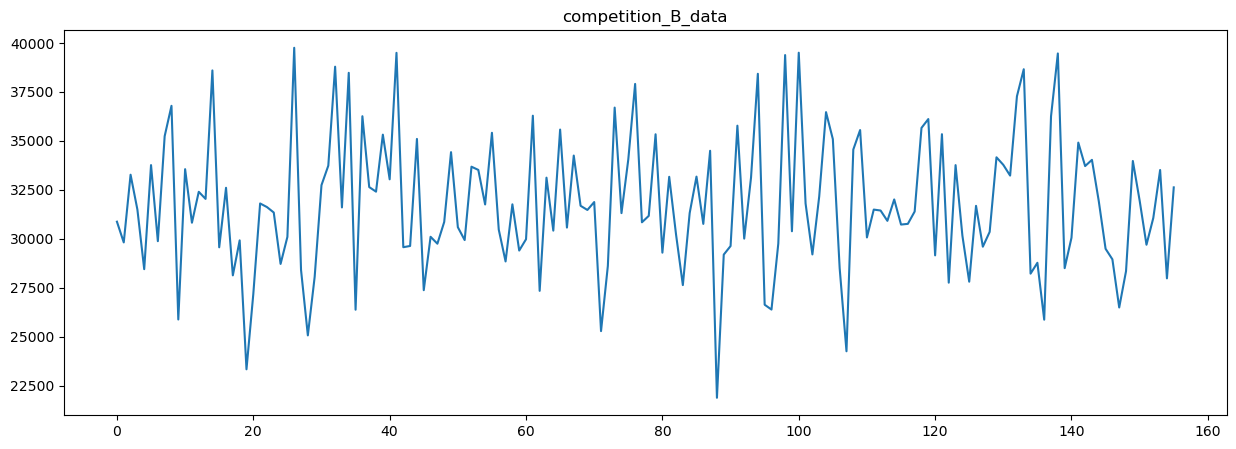

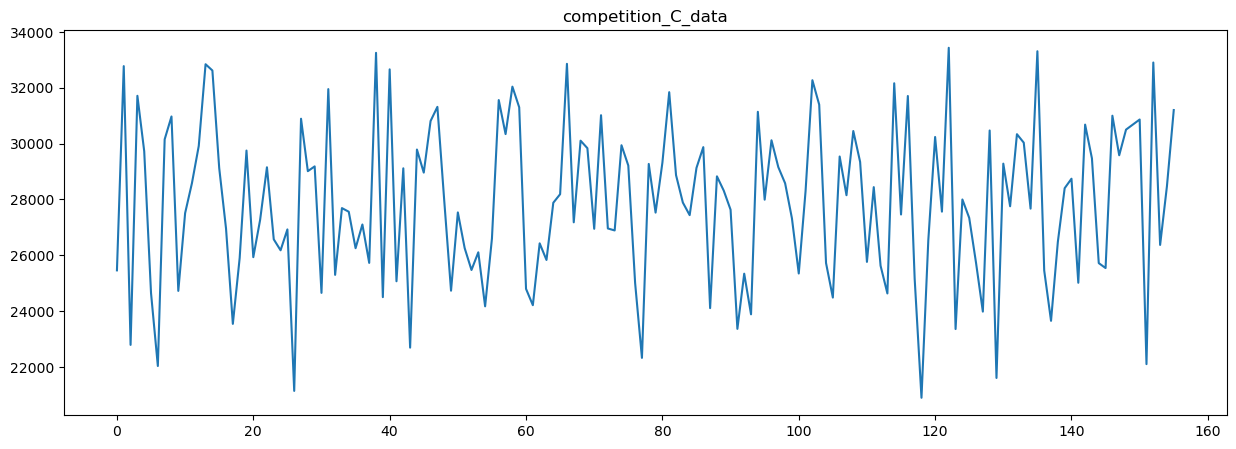

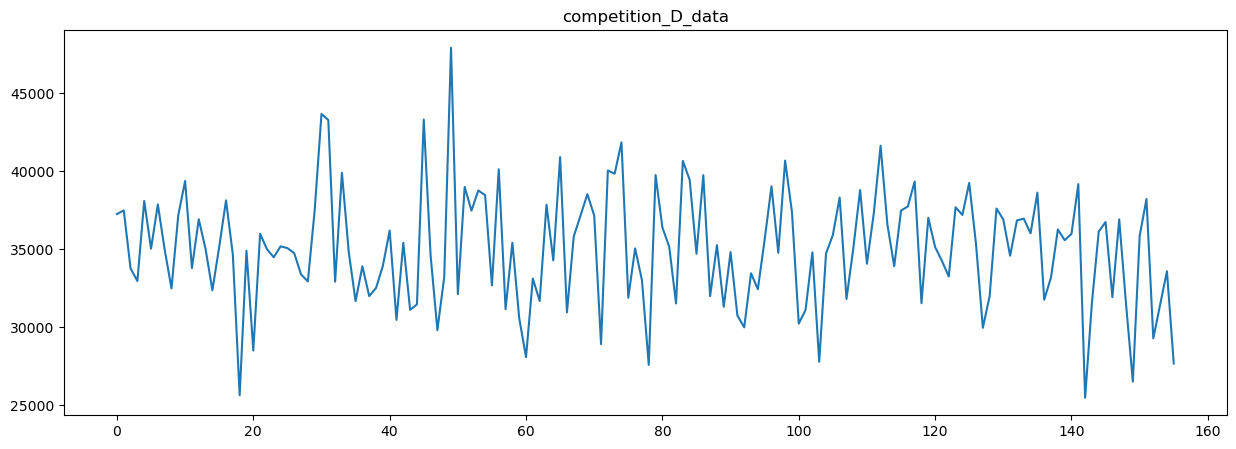

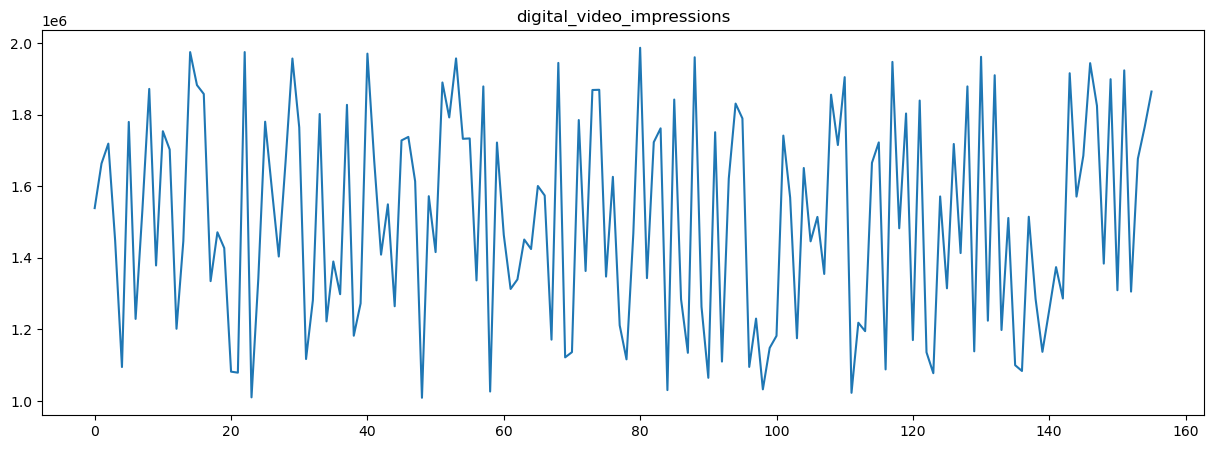

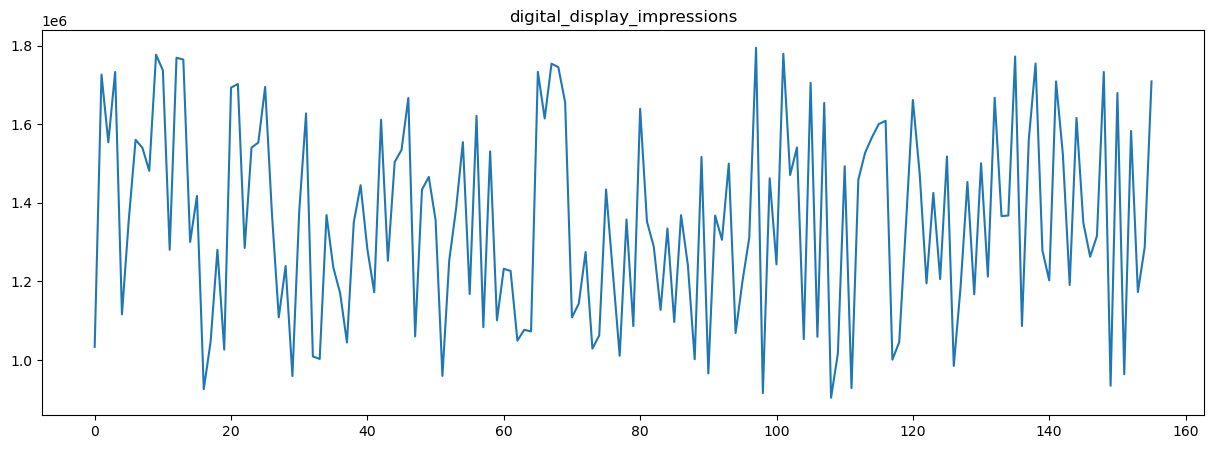

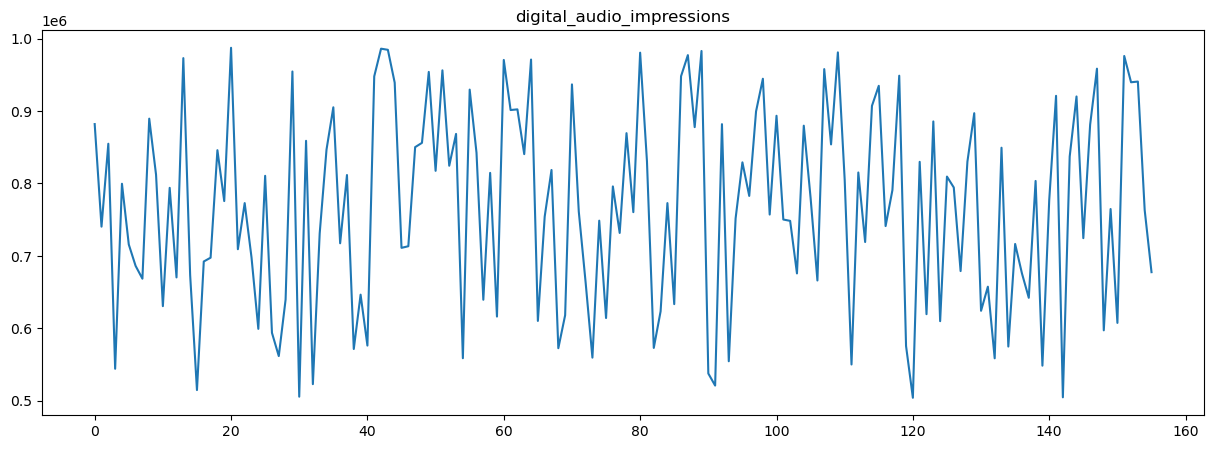

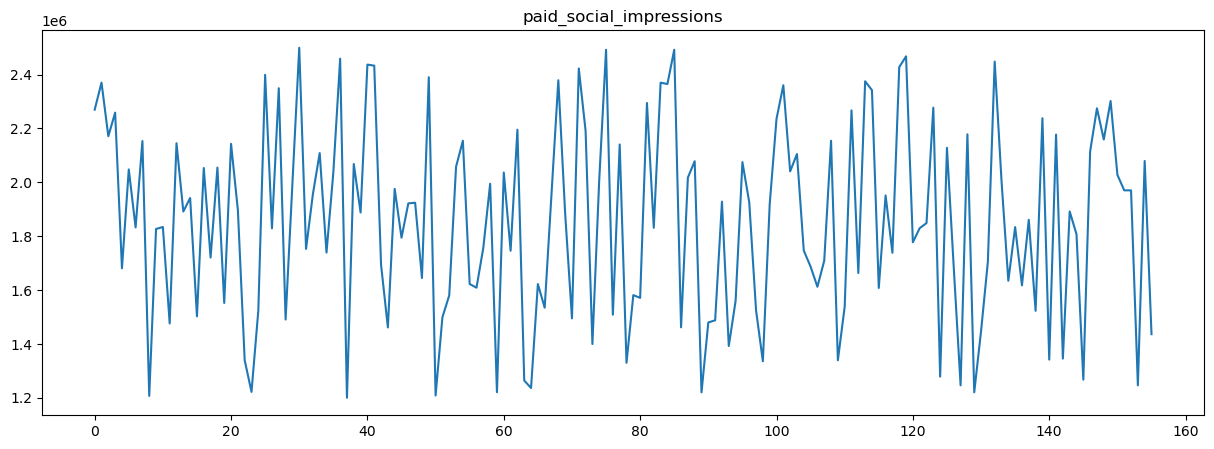

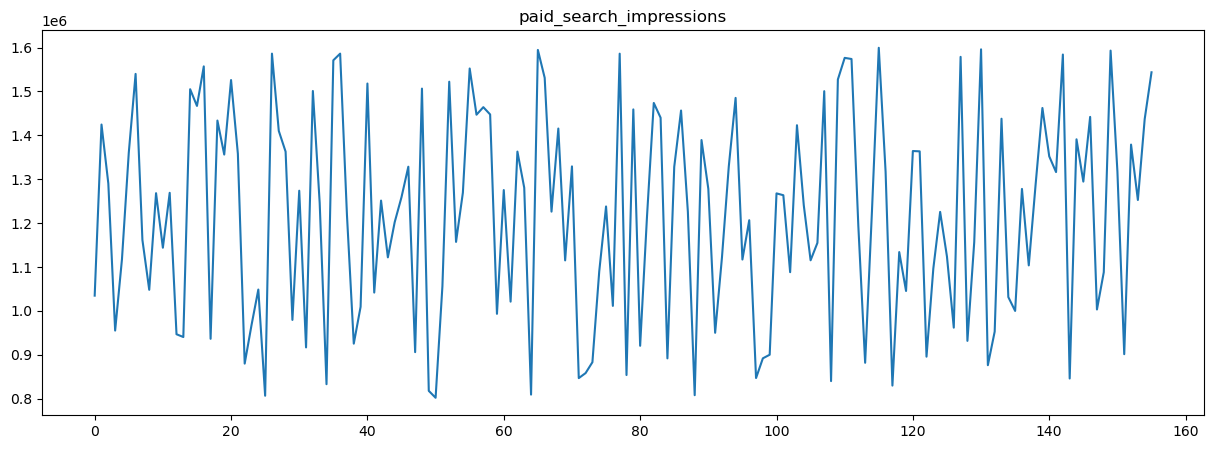

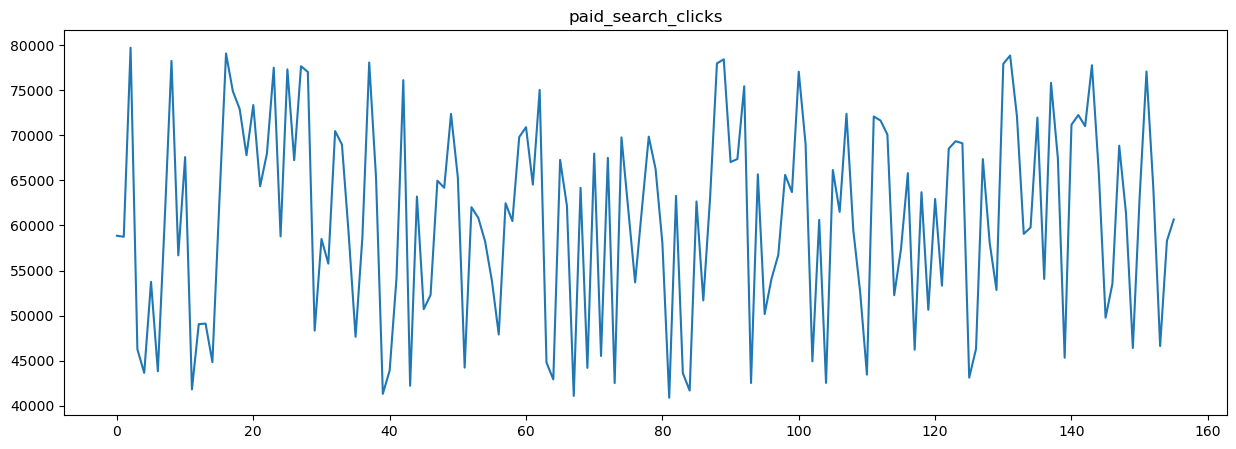

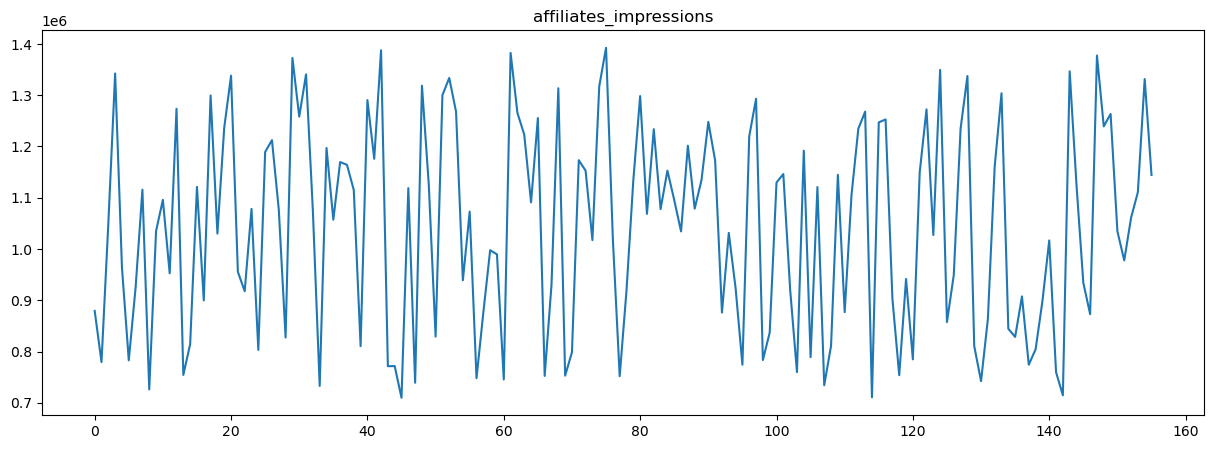

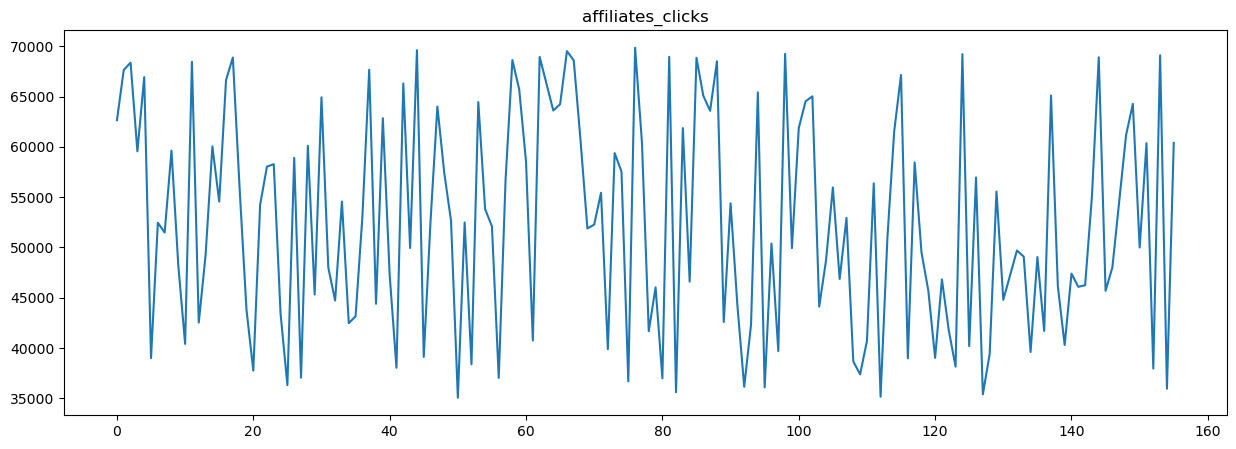

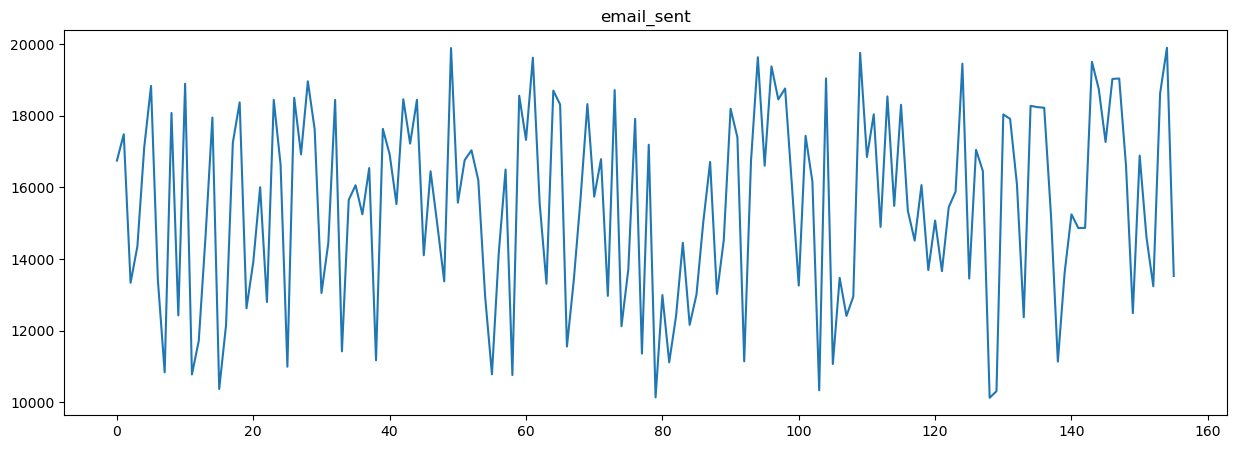

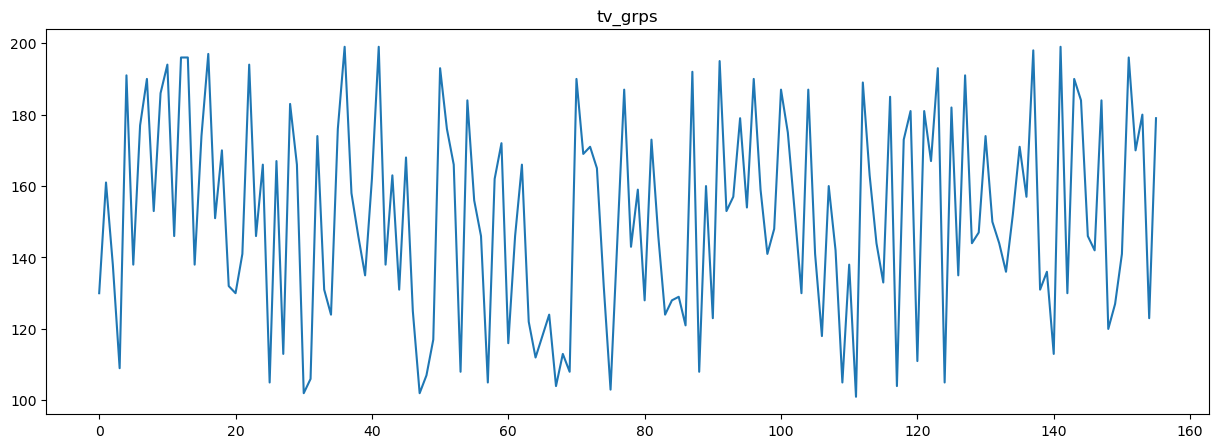

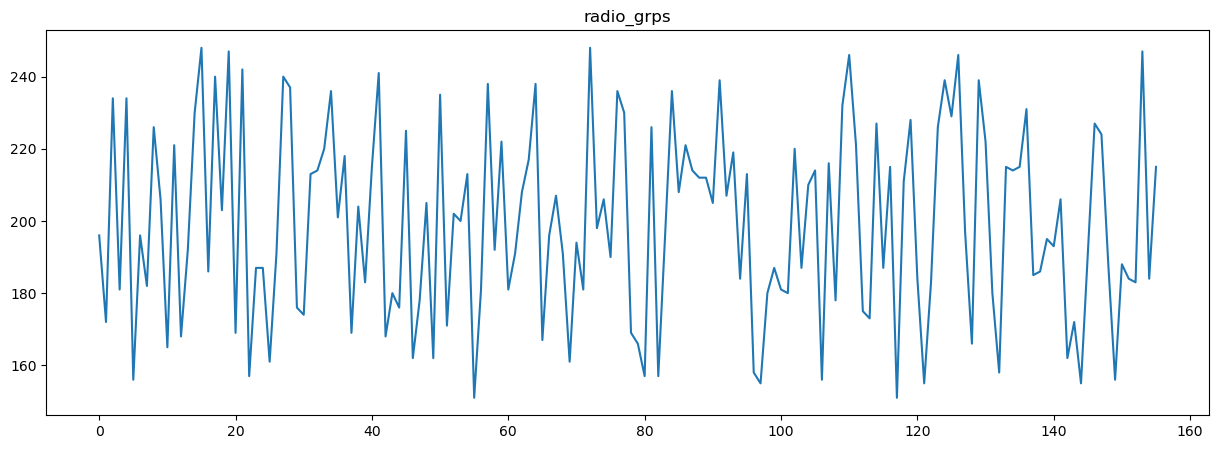

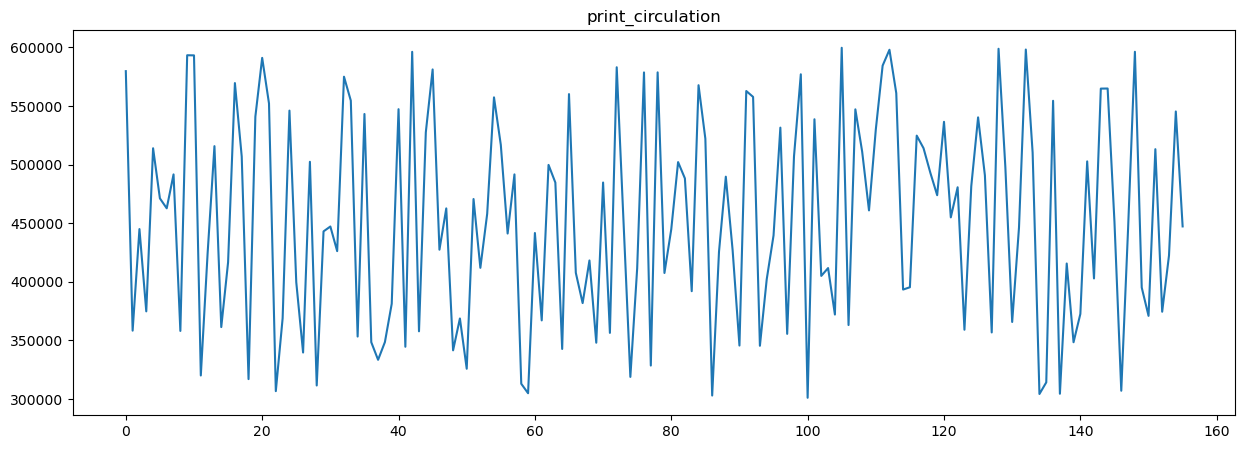

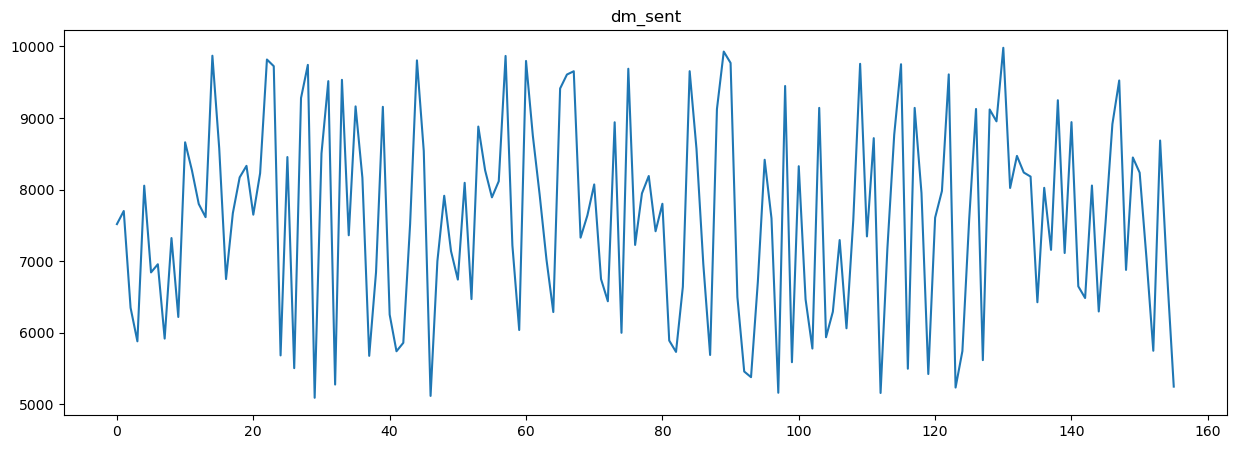

In [38]:
df= pd.read_csv('dummy_marketing_mix_data10.csv')

cols= df.columns[1:]

for i in (cols):
    plt.figure(figsize=(15,5))
    plt.plot(range(0,156), df[i])
    plt.title(i)

In [39]:
df.head(10)

,date,business_operations,inventory,price,loyalty_promotions,weather,seasonality,holiday_flags,gdp,cci,...,paid_social_impressions,paid_search_impressions,paid_search_clicks,affiliates_impressions,affiliates_clicks,email_sent,tv_grps,radio_grps,print_circulation,dm_sent
0,02/01/2022,42832,983,21.43,1661,22.62,1.00,0,-1.00,0.92,...,2269521,1034774,58858,879231,62649,16749,130,196,579789,7518
1,09/01/2022,50815,879,19.85,1469,19.03,0.90,0,-4.89,-2.63,...,2369981,1424615,58747,779378,67643,17485,161,172,358377,7701
2,16/01/2022,45337,948,21.13,1902,27.93,1.15,0,-4.92,0.83,...,2171017,1290222,79724,1049469,68366,13337,138,234,445048,6349
3,23/01/2022,41127,1003,19.29,1336,29.36,0.89,0,-10.54,-2.11,...,2258373,955213,46257,1342520,59553,14355,109,181,374833,5880
4,30/01/2022,51350,951,22.25,1080,27.90,1.20,0,-9.51,2.62,...,1680793,1117640,43635,963814,66929,17115,191,234,514001,8055
5,06/02/2022,51630,986,19.42,1540,20.16,0.89,0,-4.41,1.68,...,2047676,1360511,53742,782761,38993,18834,138,156,471244,6843
6,13/02/2022,47037,966,19.11,1459,21.73,0.90,1,-9.65,4.19,...,1832412,1539992,43813,924745,52456,13425,177,196,462769,6957
7,20/02/2022,44028,948,19.34,1030,20.16,0.80,0,-6.56,3.02,...,2153167,1161629,60480,1115712,51478,10836,190,182,491680,5918
8,27/02/2022,60101,971,19.46,1479,16.27,0.85,0,-7.97,0.62,...,1207198,1048082,78267,725968,59627,18079,153,226,358126,7323
9,06/03/2022,55255,1026,16.01,1918,18.51,0.83,0,-22.76,1.87,...,1826766,1268197,56681,1034910,48208,12426,186,206,593367,6220


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         156 non-null    object 
 1   business_operations          156 non-null    int64  
 2   inventory                    156 non-null    int64  
 3   price                        156 non-null    float64
 4   loyalty_promotions           156 non-null    int64  
 5   weather                      156 non-null    float64
 6   seasonality                  156 non-null    float64
 7   holiday_flags                156 non-null    int64  
 8   gdp                          156 non-null    float64
 9   cci                          156 non-null    float64
 10  cpi                          156 non-null    float64
 11  competition_A_data           156 non-null    int64  
 12  competition_B_data           156 non-null    int64  
 13  competition_C_data  